<a href="https://colab.research.google.com/github/Mohammed287-lab/ANN/blob/main/Demo_on_ANN_for_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor # Changed MLPRegrssor to MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
data = pd.read_csv('gila_river.csv')

In [13]:
data.head()

,x(t-1),x(t-2),x(t-3),y
0,20,20,16,20
1,17,18,18,18
2,19,19,18,19
3,18,17,18,19
4,18,16,20,20


In [15]:
data.shape

(12, 4)

In [16]:
x=data.drop(columns=['y'])
y=data['y']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
mlp=MLPRegressor(hidden_layer_sizes=(64,64),max_iter=3000)

In [20]:
mlp.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [21]:
y__train_pred=mlp.predict(x_train)
y__test_pred=mlp.predict(x_test)

In [22]:
msr_train=mean_squared_error(y_train,y__train_pred)
msr_test=mean_squared_error(y_test,y__test_pred)

In [23]:
print(f"Training Mean Squared Error: {msr_train}")
print(f"Testing Mean Squared Error: {msr_test}")

Training Mean Squared Error: 0.22809496687183264
Testing Mean Squared Error: 16.881109522393054


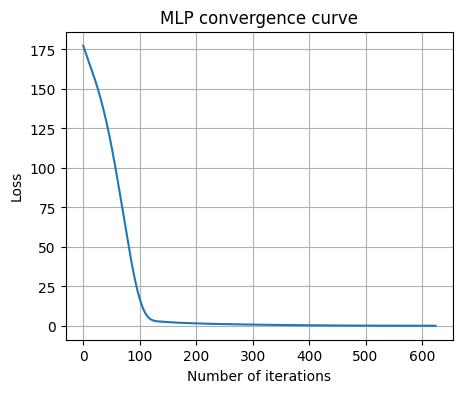

In [24]:
plt.figure(figsize=(5,4))
plt.plot(mlp.loss_curve_)
plt.title('MLP convergence curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

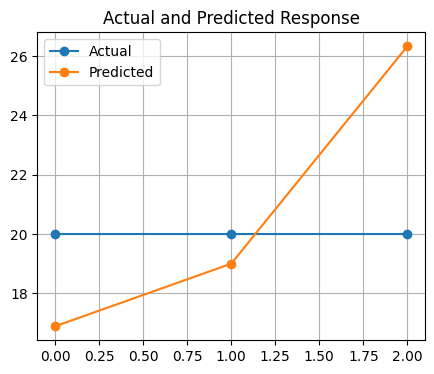

In [28]:
t=range(len(y_test))
plt.figure(figsize=(5,4))
plt.plot(t,y_test,label='Actual',linestyle='-',marker='o') # Changed 'maker' to 'marker'
plt.plot(t,y__test_pred,label='Predicted',linestyle='-',marker='o') # Changed 'maker' to 'marker' and 'lineStyles' to 'linestyle'
plt.title('Actual and Predicted Response')
plt.legend()
plt.grid(True)
plt.show()

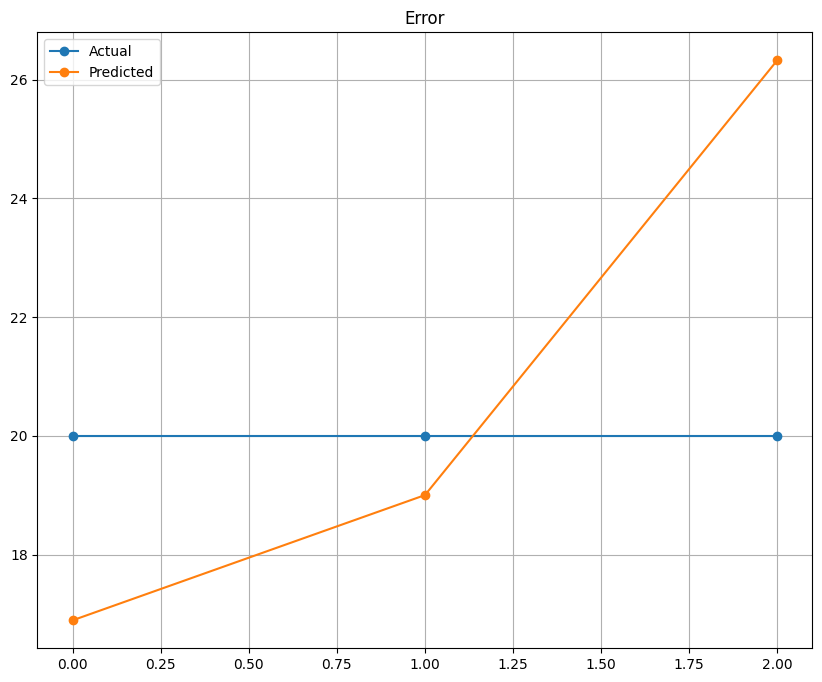

In [34]:
t=range(len(y_test))
plt.figure(figsize=(10,8))
plt.plot(t,y_test,label='Actual',linestyle='-',marker='o') # Changed 'maker' to 'marker'
plt.plot(t,y__test_pred,label='Predicted',linestyle='-',marker='o') # Changed 'maker' to 'marker' and 'lineStyles' to 'linestyle'
plt.title('Actual and Predicted Response')
plt.title('Error')
plt.legend()
plt.grid(True)
plt.show()